<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Keras/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

In [208]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

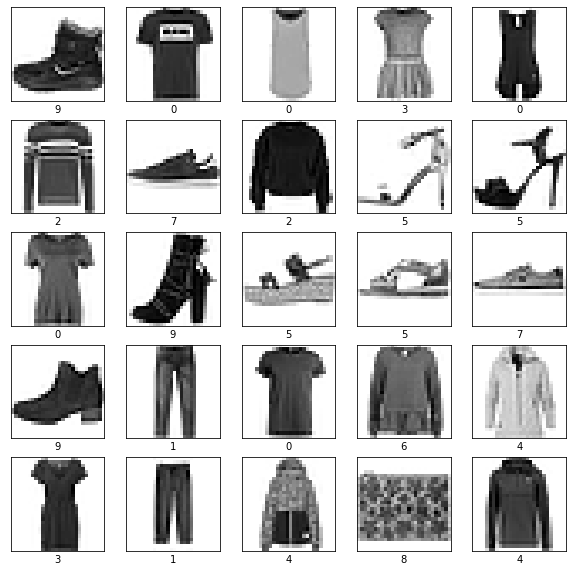

In [209]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [210]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Model 1

In [211]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', input_shape=(784,), name="dense_1"),
    # Dense(256, activation='relu', name="dense_2"),
    Dense(10, activation='softmax', name="predictions"), 
])


model.compile(optimizer = optimizers.Adam(learning_rate=0.01), 
              loss ='sparse_categorical_crossentropy', 
              metrics = ['sparse_categorical_accuracy']
              )

In [212]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 predictions (Dense)         (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


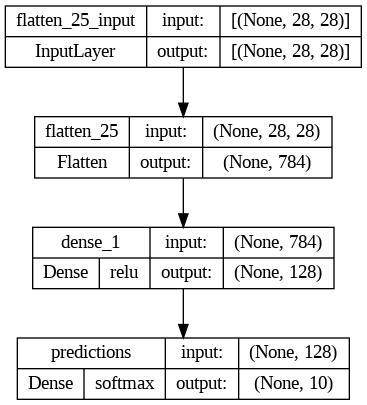

In [213]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True, show_layer_activations=True)

In [214]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=10,
    batch_size=256,
    validation_split=0.2,
    verbose = 2
)

Epoch 1/10
188/188 - 2s - loss: 44.7110 - sparse_categorical_accuracy: 0.5753 - val_loss: 1.0518 - val_sparse_categorical_accuracy: 0.6289 - 2s/epoch - 9ms/step
Epoch 2/10
188/188 - 1s - loss: 0.9432 - sparse_categorical_accuracy: 0.6649 - val_loss: 0.8326 - val_sparse_categorical_accuracy: 0.6824 - 1s/epoch - 6ms/step
Epoch 3/10
188/188 - 1s - loss: 0.7746 - sparse_categorical_accuracy: 0.7099 - val_loss: 0.7317 - val_sparse_categorical_accuracy: 0.7342 - 1s/epoch - 7ms/step
Epoch 4/10
188/188 - 1s - loss: 0.6940 - sparse_categorical_accuracy: 0.7400 - val_loss: 0.6978 - val_sparse_categorical_accuracy: 0.7683 - 1s/epoch - 6ms/step
Epoch 5/10
188/188 - 1s - loss: 0.6572 - sparse_categorical_accuracy: 0.7549 - val_loss: 0.6908 - val_sparse_categorical_accuracy: 0.7422 - 1s/epoch - 6ms/step
Epoch 6/10
188/188 - 1s - loss: 0.6149 - sparse_categorical_accuracy: 0.7693 - val_loss: 0.6556 - val_sparse_categorical_accuracy: 0.7762 - 1s/epoch - 6ms/step
Epoch 7/10
188/188 - 1s - loss: 0.5884 

In [215]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


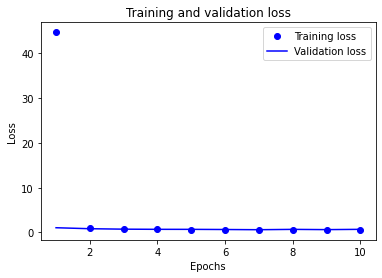

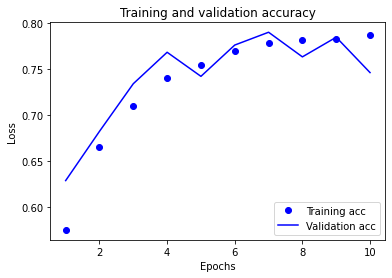

In [216]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['sparse_categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

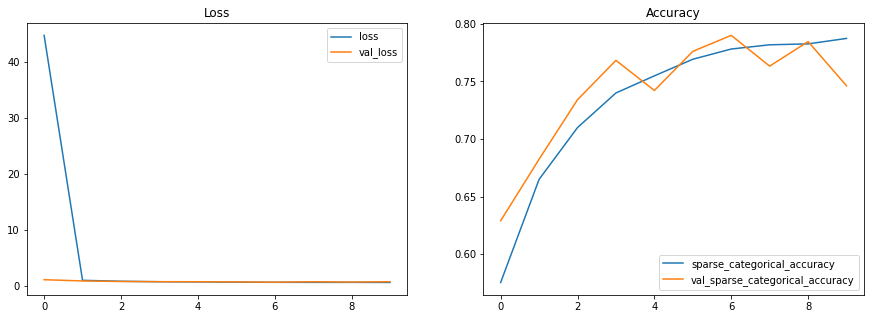

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history["loss"], label="loss")
ax[0].plot(history.history["val_loss"], label="val_loss")
ax[0].set_title("Loss")
ax[0].legend()
ax[1].plot(history.history["sparse_categorical_accuracy"], label="sparse_categorical_accuracy")
ax[1].plot(history.history["val_sparse_categorical_accuracy"], label="val_sparse_categorical_accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()
plt.show()

In [218]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6946 - sparse_categorical_accuracy: 0.7367
Test loss: 0.6946069598197937
Test accuracy: 0.7366999983787537


313/313 [==============================] - 1s 3ms/step
Prediction: 9
Actual: 9


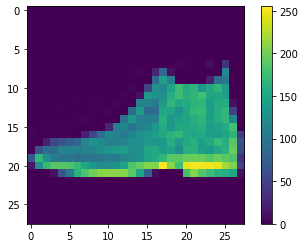

In [219]:
predictions = model.predict(x_test)

print("Prediction:", np.argmax(predictions[0]))
print("Actual:", y_test[0])

plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

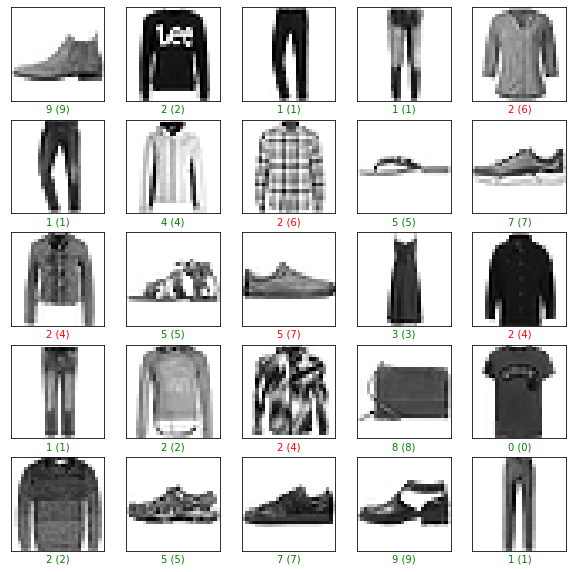

In [220]:
# predictions = model.predict(x_test)

# fig, ax = plt.subplots(1, 10, figsize=(20, 20))
# for i in range(10):
#     ax[i].imshow(x_test[i], cmap=plt.cm.binary)
#     if np.argmax(predictions[i]) == y_test[i]:
#         color = "green"
#     else:
#         color = "red"
#     ax[i].set_xlabel("{} ({})".format(np.argmax(predictions[i]), y_test[i]), color=color)
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])
    
    
# plt.show()

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_test[i*5+j], cmap=plt.cm.binary)
        if np.argmax(predictions[i*5+j]) == y_test[i*5+j]:
            color = "green"
        else:
            color = "red"
        ax[i, j].set_xlabel("{} ({})".format(np.argmax(predictions[i*5+j]), y_test[i*5+j]), color=color)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()


# Model 2 ( 5 layers)

In [221]:
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
   
    Dense(128, activation='relu', name="dense_1"),
    Dense(128, activation='relu', name="dense_2"),
    Dense(128, activation='relu', name="dense_3"),
    Dense(128, activation='relu', name="dense_4"),
    Dense(128, activation='relu', name="dense_5"),
    Dense(10, activation='softmax', name="predictions"), 
    # Dense(10, activation='sigmoid', name="predictions"), 
])


model_2.compile(optimizer = 'adam', 
              loss ='sparse_categorical_crossentropy', 
              metrics = ['accuracy']
              )

In [222]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 predictions (Dense)         (None, 10)              

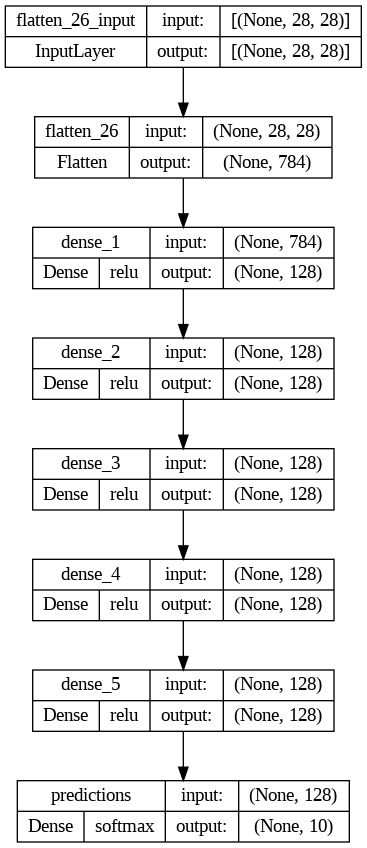

In [223]:
keras.utils.plot_model(model_2, "my_first_model_with_shape_info.png", show_shapes=True, show_layer_activations=True)

In [225]:
history_2 = model_2.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3199 - accuracy: 0.8844 - val_loss: 0.3906 - val_accuracy: 0.8686
Epoch 2/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3135 - accuracy: 0.8867 - val_loss: 0.3611 - val_accuracy: 0.8802
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3025 - accuracy: 0.8902 - val_loss: 0.3488 - val_accuracy: 0.8791
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3047 - accuracy: 0.8920 - val_loss: 0.3917 - val_accuracy: 0.8727
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2964 - accuracy: 0.8923 - val_loss: 0.3800 - val_accuracy: 0.8748
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2950 - accuracy: 0.8915 - val_loss: 0.3805 - val_accuracy: 0.8734
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2884 - accuracy: 0.8949 - val_loss: 0.3601 - val_a

In [227]:
test_loss_model_2, test_acc_model_2 = model_2.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_loss_model_2)
print("Test accuracy:", test_acc_model_2)

313/313 - 1s - loss: 0.4174 - accuracy: 0.8742 - 664ms/epoch - 2ms/step
Test loss: 0.4174309968948364
Test accuracy: 0.8741999864578247


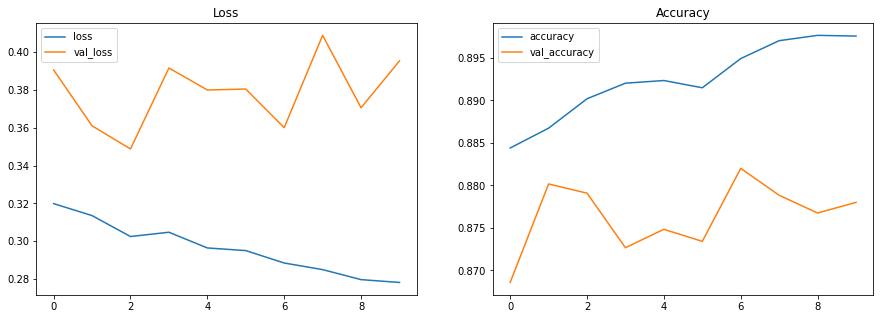

In [228]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history_2.history["loss"], label="loss")
ax[0].plot(history_2.history["val_loss"], label="val_loss")
ax[0].set_title("Loss")
ax[0].legend()
ax[1].plot(history_2.history["accuracy"], label="accuracy")
ax[1].plot(history_2.history["val_accuracy"], label="val_accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()
plt.show()

313/313 [==============================] - 1s 4ms/step
Loss:  0.4174309968948364
Accuracy:  0.8741999864578247


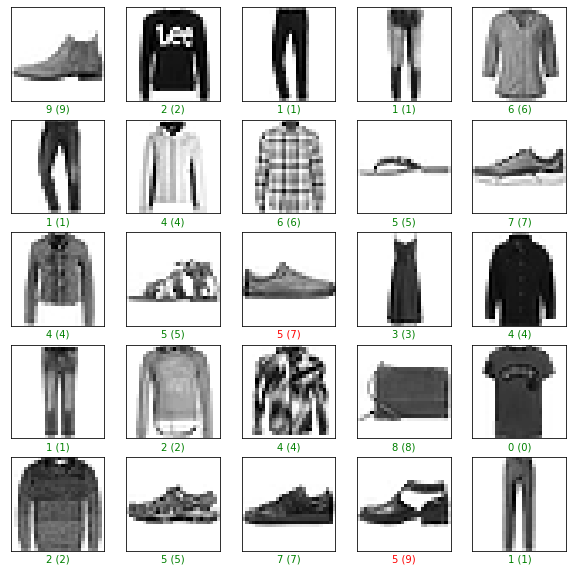

In [229]:
predictions_model_2 = model_2.predict(x_test)

print('Loss: ', test_loss_model_2)
print('Accuracy: ', test_acc_model_2)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_model_2[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
    
plt.show()

# Model 3

In [247]:
model_3 = Sequential(
    [
        Flatten(input_shape =(28, 28)),
     Dense(128, activation='relu', name='dense_1'),
     Dense(128, activation='relu', name='dense_2'),
     Dense(128, activation='relu', name='dense_3'),
    #  Dense(128, activation='relu', name='dense_4'),
    #  Dense(128, activation='relu', name='dense_5'),
     Dense(10, activation='softmax', name='predictions'),
    ]
)

model_3.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['sparse_categorical_accuracy']
)

model_3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 predictions (Dense)         (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


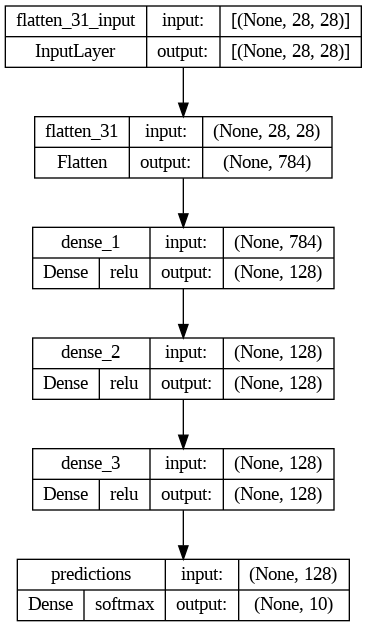

In [249]:
keras.utils.plot_model(model_3, "my_first_model_with_shape_info.png", show_shapes=True, show_layer_activations=True)

In [250]:
history_model_3 = model_3.fit(
    x_train, 
    y_train, 
    epochs=15,
    batch_size=256,
    validation_split=0.2,
    verbose = 2
)

Epoch 1/15
188/188 - 3s - loss: 0.3460 - sparse_categorical_accuracy: 0.8744 - val_loss: 0.4617 - val_sparse_categorical_accuracy: 0.8533 - 3s/epoch - 14ms/step
Epoch 2/15
188/188 - 2s - loss: 0.3205 - sparse_categorical_accuracy: 0.8839 - val_loss: 0.4505 - val_sparse_categorical_accuracy: 0.8540 - 2s/epoch - 9ms/step
Epoch 3/15
188/188 - 2s - loss: 0.3262 - sparse_categorical_accuracy: 0.8809 - val_loss: 0.4785 - val_sparse_categorical_accuracy: 0.8480 - 2s/epoch - 9ms/step
Epoch 4/15
188/188 - 2s - loss: 0.3190 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.4808 - val_sparse_categorical_accuracy: 0.8507 - 2s/epoch - 8ms/step
Epoch 5/15
188/188 - 2s - loss: 0.3062 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.5060 - val_sparse_categorical_accuracy: 0.8475 - 2s/epoch - 9ms/step
Epoch 6/15
188/188 - 2s - loss: 0.3036 - sparse_categorical_accuracy: 0.8873 - val_loss: 0.4632 - val_sparse_categorical_accuracy: 0.8486 - 2s/epoch - 9ms/step
Epoch 7/15
188/188 - 3s - loss: 0.2964 

In [251]:
test_loss_model_3, test_acc_model_3 = model_3.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_loss_model_3)
print("Test accuracy:", test_acc_model_3)

313/313 - 1s - loss: 0.4452 - sparse_categorical_accuracy: 0.8650 - 1s/epoch - 3ms/step
Test loss: 0.44520142674446106
Test accuracy: 0.8650000095367432


In [252]:
history_model_3.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

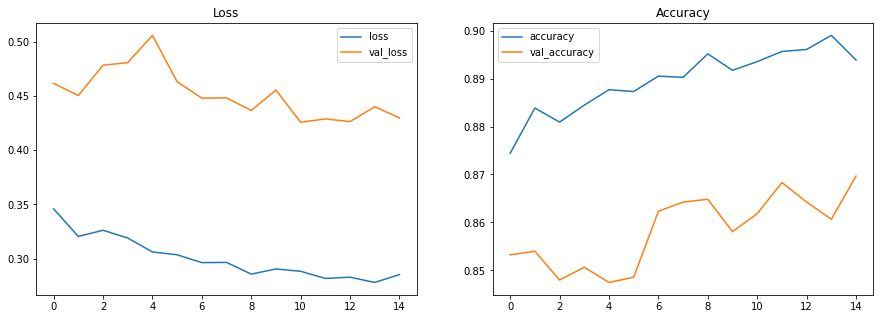

In [253]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history_model_3.history["loss"], label="loss")
ax[0].plot(history_model_3.history["val_loss"], label="val_loss")
ax[0].set_title("Loss")
ax[0].legend()
ax[1].plot(history_model_3.history["sparse_categorical_accuracy"], label="accuracy")
ax[1].plot(history_model_3.history["val_sparse_categorical_accuracy"], label="val_accuracy")
ax[1].set_title("Accuracy")
ax[1].legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Loss:  0.44520142674446106
Accuracy:  0.8650000095367432


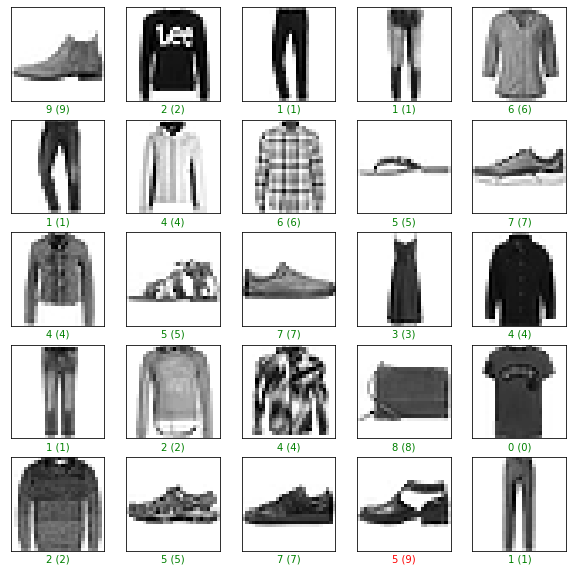

In [254]:
predictions_model_3 = model_3.predict(x_test)

print('Loss: ', test_loss_model_3)
print('Accuracy: ', test_acc_model_3)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_model_3[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
    
plt.show()

## Loss/Acc

In [236]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.6946 - sparse_categorical_accuracy: 0.7367
Test loss: 0.6946069598197937
Test accuracy: 0.7366999983787537


In [237]:
test_loss_model_2, test_acc_model_2 = model_2.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_loss_model_2)
print("Test accuracy:", test_acc_model_2)

313/313 - 1s - loss: 0.4174 - accuracy: 0.8742 - 964ms/epoch - 3ms/step
Test loss: 0.4174309968948364
Test accuracy: 0.8741999864578247


In [238]:
test_loss_model_3, test_acc_model_3 = model_3.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_loss_model_3)
print("Test accuracy:", test_acc_model_3)

313/313 - 1s - loss: 0.4266 - sparse_categorical_accuracy: 0.8551 - 876ms/epoch - 3ms/step
Test loss: 0.4266435205936432
Test accuracy: 0.8550999760627747
